In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Story

In [2]:
dataset = pd.read_csv("../data/train/train_feature.csv", index_col='id')
dataset.head()

,num_orders,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount,year,month,week_in_month
id,,,,,,,,,,,,,,,,,,
1379560,177,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai,15.46,1,1,1
1466964,270,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,1,1,1
1346989,189,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1.00,1,1,1
1338232,54,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0,Beverages,Indian,98.03,1,1,1
1448490,40,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,1,1,1


In [3]:
categorical_columns = ['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'city_code', 
                       'region_code', 'center_type', 'category', 'cuisine','year','month','week_in_month']
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 1379560 to 1361984
Data columns (total 18 columns):
num_orders               456548 non-null int64
week                     456548 non-null category
center_id                456548 non-null category
meal_id                  456548 non-null category
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null category
homepage_featured        456548 non-null category
city_code                456548 non-null category
region_code              456548 non-null category
center_type              456548 non-null category
op_area                  456548 non-null float64
category                 456548 non-null category
cuisine                  456548 non-null category
discount                 456548 non-null float64
year                     456548 non-null category
month                    456548 non-null category
week_in_month            456548 non-nul

### What is the total trend of orders ?

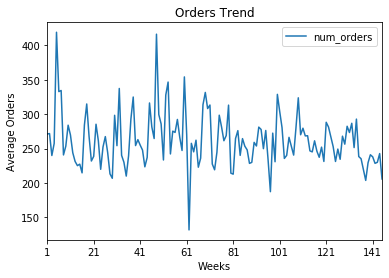

In [4]:
overall_orders_trend = dataset[['week', 'num_orders']].groupby('week').mean()

overall_orders_trend.reset_index().plot('week', 'num_orders')
_ = plt.title("Orders Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Average Orders")
plt.show()

There were maximum orders in week 48 and 5 and minimum orders in week 62. These raises below questions:
1. What went good in week 48 and 5 ?
2. What went wrong in week 62 ?

#### Compare week 62 and week 48

Let's compare the distribution of num_orders

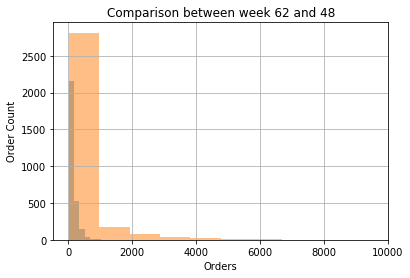

In [5]:
dataset_week_62 = dataset[dataset.week == 62]
dataset_week_48 = dataset[dataset.week == 48]

dataset_week_62.num_orders.hist(alpha=0.5)
dataset_week_48.num_orders.hist(alpha=0.5)

_ = plt.xlabel('Orders')
_ = plt.ylabel('Order Count')
_ = plt.title('Comparison between week 62 and 48')
plt.show()

<p>There is a hugh difference between the distribution.</p>

In [6]:
dataset_week_62.emailer_for_promotion.value_counts()

0    2715
1     175
Name: emailer_for_promotion, dtype: int64

In [7]:
dataset_week_48.emailer_for_promotion.value_counts()

0    2729
1     401
Name: emailer_for_promotion, dtype: int64

In [8]:
dataset[dataset.week == 5].emailer_for_promotion.value_counts()

0    2522
1     337
Name: emailer_for_promotion, dtype: int64

There were almost double promotional activity, by email, in week 48 and week 5 as compare to week 62. Hence, there is hugh difference in number of orders.

#### What is the trend of orders considering time series ?

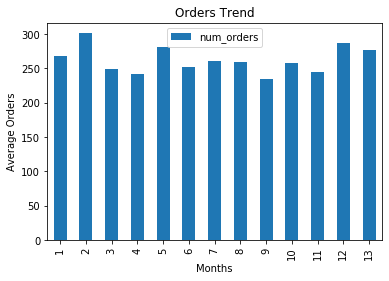

In [9]:
month_trend = dataset[['month', 'num_orders']].groupby('month').mean()

month_trend.reset_index().plot('month', 'num_orders', kind='bar')
_ = plt.title("Orders Trend")
_ = plt.xlabel("Months")
_ = plt.ylabel("Average Orders")
plt.show()

Month 2 has highest orders while Month 9 has lowest orders

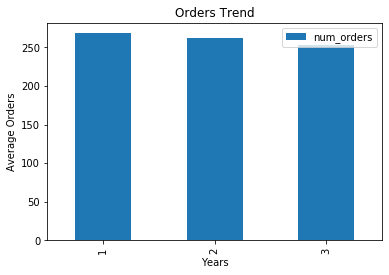

In [10]:
year_trend = dataset[['year', 'num_orders']].groupby('year').mean()

year_trend.reset_index().plot('year', 'num_orders', kind='bar')
_ = plt.title("Orders Trend")
_ = plt.xlabel("Years")
_ = plt.ylabel("Average Orders")
plt.show()

Note: we cannot conclude anything from year because we have only 3 years of data and that too 3rd year is incomplete.

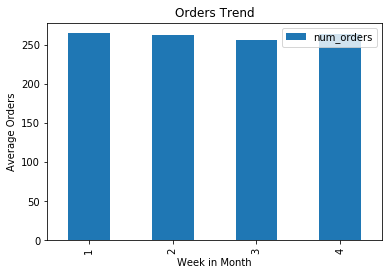

In [11]:
week_in_month_trend = dataset[['week_in_month', 'num_orders']].groupby('week_in_month').mean()

week_in_month_trend.reset_index().plot('week_in_month', 'num_orders', kind='bar')
_ = plt.title("Orders Trend")
_ = plt.xlabel("Week in Month")
_ = plt.ylabel("Average Orders")
plt.show()

Start and end of the month has more orders than 2nd and 3rd week of the month

### What is the trend in Meal?

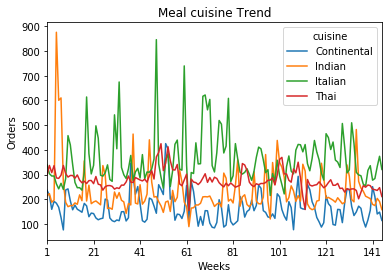

In [12]:
cuisine_trend = dataset.pivot_table(index='week', columns='cuisine', values='num_orders', aggfunc='mean')

cuisine_trend.plot()
_ = plt.title("Meal cuisine Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Below points can be concluded from above plot:
1. Customers really likes Italian meals
2. Continental meals have consistently lower orders as compare to other cuisine
3. There is fluctuations in Indian meals

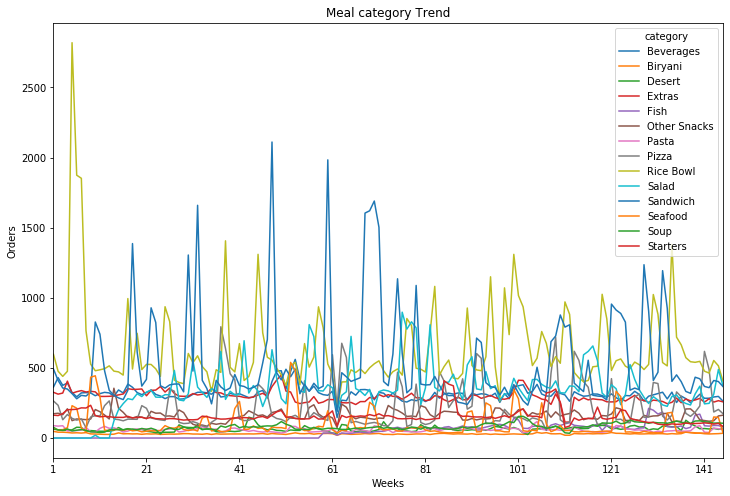

In [13]:
category_trend = dataset.pivot_table(index='week', columns='category', values='num_orders', aggfunc='mean')
category_trend = category_trend.fillna(0)

category_trend.plot(figsize=(12, 8))
_ = plt.title("Meal category Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Below points can be concluded from above plot:
1. Customers mostly orders Beverages
2. Many categories, like Soup, Pizza and Fish, with low orders
3. There is fluctuations in Sandwich and Rice Bowl
4. After week 18, Salad became popular with customers.

### What is the trend in Centers ?

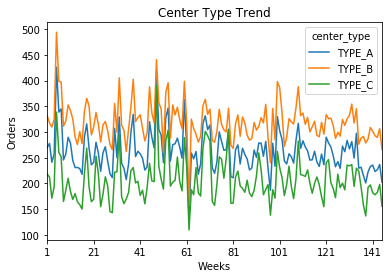

In [14]:
center_type_trend = dataset.pivot_table(index='week', columns='center_type', values='num_orders', 
                                        aggfunc='mean')

center_type_trend.plot()
_ = plt.title("Center Type Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Center type TYPE_B always has more orders than other 2 types

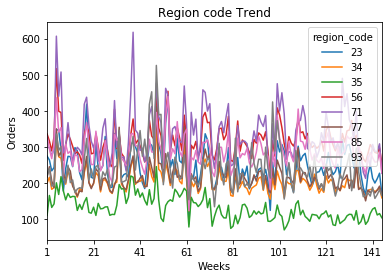

In [15]:
region_code_trend = dataset.pivot_table(index='week', columns='region_code', values='num_orders', 
                                        aggfunc='mean')

region_code_trend.plot()
_ = plt.title("Region code Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Below points can be concluded from above plot:
1. Region code 35 has lowest orders
2. There are fluctuations in almost all regions

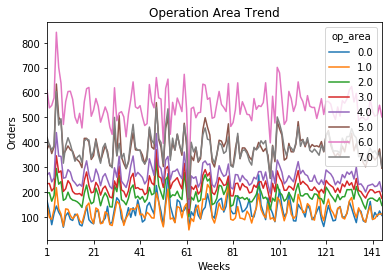

In [16]:
op_area_trend = dataset.copy()
op_area_trend['op_area'] = np.floor(op_area_trend['op_area'])
op_area_trend = op_area_trend.pivot_table(index='week', columns='op_area', values='num_orders', 
                                          aggfunc='mean')

op_area_trend.plot()
_ = plt.title("Operation Area Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")
plt.show()

Orders has positive correlation with operating area

# Summary

1. There were less orders in week 62 and week high orders in week 48 and week 5 because of emailer promotion activity
2. Month 2 has highest orders while Month 9 has lowest orders
3. Start and end of the month has more orders than 2nd and 3rd week of the month
4. Customers orders Italian meals and Beverages
5. There is fluctuation in orders of Indian meals, Rice Bowl and Sandwich
6. After week 18, Salad gain popularity among customers
7. TYPE_B Centers get more orders than TYPE_A and TYPE_C centers
8. Centers with region code 35 has lowest orders
9. There are fluctuations in almost all regions
10. Orders has positive correlation with operating area